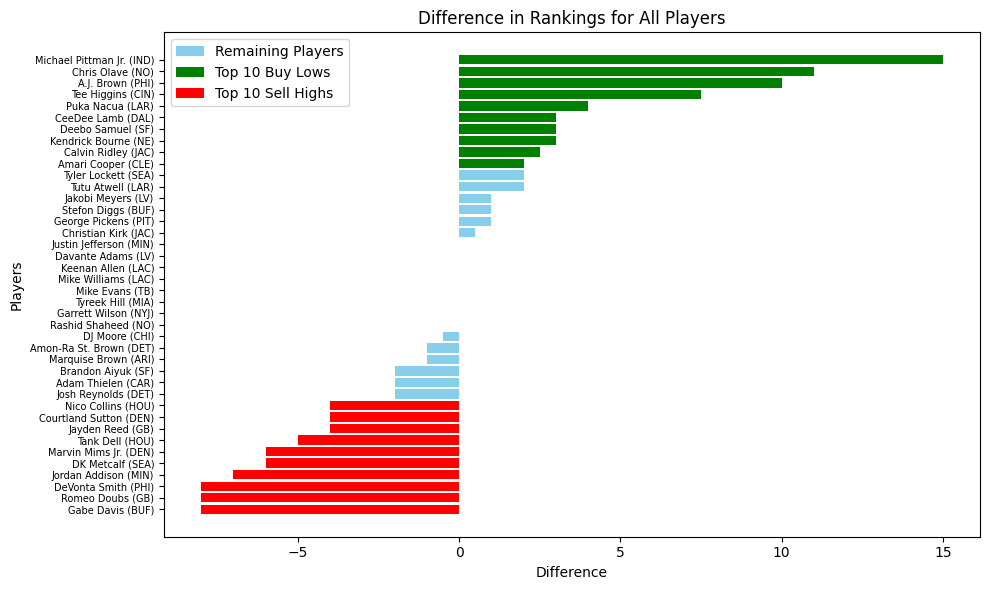

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Website url
url = 'https://www.fantasypros.com/nfl/stats/wr.php'

# Send a GET request to the URL and fetch the HTML content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Assuming the table data is in a table element, find the table
    table = soup.find('table')

    # Initialize empty lists to store the data
    data = []
    headers = []

    # Extract table headers
    for th in table.find_all('th'):
        headers.append(th.text.strip())

    # Extract table rows (excluding the header row)
    for tr in table.find_all('tr')[1:]:
        row_data = []
        for td in tr.find_all('td'):
            row_data.append(td.text.strip())
        data.append(row_data)

    # Create a DataFrame
    df = pd.DataFrame(data, columns=headers)

    # Drop the first row
    df.drop(0, inplace=True)

    # Reset the index of the DataFrame after dropping the row
    df.reset_index(drop=True, inplace=True)

    df['TGT'] = pd.to_numeric(df['TGT'], errors='coerce')
    df['G'] = pd.to_numeric(df['G'], errors='coerce')
    df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
    df = df[df['Rank'] <= 40]
    df['Targets/Game'] = df['TGT'] / df['G']

    df.columns = column_names = ['Rank', 'Player', 'REC', 'TGT', 'YDS', 'Y/R', 'LG', '20+', 'TD', 'ATT', 'Rushing_YDS', 'Rushing_TD', 'FL', 'G', 'FPTS', 'FPTS/G', 'ROST', 'Targets/Game']
   # df.drop(df.columns[9], axis=1, inplace=True)
   # df.drop(df.columns[9], axis=1, inplace=True)
   # df.drop(df.columns[9], axis=1, inplace=True)
    df['TD'] = pd.to_numeric(df['TD'], errors='coerce')
    df['TDs per Game'] = df['TD'] / df['G']
    df['Points from Targets'] = df['Targets/Game'] * 0.74
    df['YDS'] = df['YDS'].str.replace(',', '')
    df['YDS'] = pd.to_numeric(df['YDS'], errors='coerce')
    df['Points from Yards'] = df['YDS'] / df['G'] / 10
    df['Points from TDs'] = df['TD'] / df['G'] * 6
    df['My Score'] = df['Points from Targets'] + df['Points from Yards'] + df['Points from TDs']
    df['My Rank'] = df['My Score'].rank(ascending=False)

    df['Sum'] = df['Points from Yards'] + df['Points from TDs']


    df['Fantasy Rank'] = df['Sum'].rank(ascending=False)
   # df['FPTS'] = pd.to_numeric(df['FPTS'], errors='coerce')
    #df['Fantasy Rank'] = df['FPTS'].sort_values(ascending=False, method='min')


    df['Difference'] = df['Fantasy Rank'] - df['My Rank']
    df_sorted = df.sort_values(by='Difference', ascending=False)

  #  print("The top 10 players to buy low:")
    top_10_players = df_sorted[['Player', 'Difference']].head(10)
   # print(top_10_players)

    df_sorted = df.sort_values(by='Difference', ascending=True)

   # print("The top 10 players to sell high:")
    bottom_10_players = df_sorted[['Player', 'Difference']].head(10)
   # print(bottom_10_players)
    df.drop('REC', axis=1, inplace=True)
    df.drop('Y/R', axis=1, inplace=True)
    df.drop('LG', axis=1, inplace=True)
    df.drop('20+', axis=1, inplace=True)
    df.drop('Rushing_TD', axis=1, inplace=True)
    df.drop('FL', axis=1, inplace=True)
    df.drop('ATT', axis=1, inplace=True)
    df.drop('ROST', axis=1, inplace=True)
    df.drop('FPTS/G', axis=1, inplace=True)
    df.drop('Rushing_YDS', axis=1, inplace=True)
    #print(df)

    # Assuming you have already fetched and filtered the DataFrame and calculated the "Difference" column as shown in the previous code

    # Sort the DataFrame by the "Difference" column in ascending order
    df_sorted = df.sort_values(by='Difference')

    # Get the top 10 highest and lowest players
    top_10_lowest = df_sorted.head(10)
    top_10_highest = df_sorted.tail(10)

    # Create a horizontal bar plot for all players' differences
    plt.figure(figsize=(10, 6))
    plt.barh(df_sorted['Player'], df_sorted['Difference'], color='skyblue', label='Remaining Players')

    # Highlight the top 10 highest and lowest players with a different color
    plt.barh(top_10_highest['Player'], top_10_highest['Difference'], color='green', label='Top 10 Buy Lows')
    plt.barh(top_10_lowest['Player'], top_10_lowest['Difference'], color='red', label='Top 10 Sell Highs')

    # Set plot labels and title
    plt.xlabel('Difference')
    plt.ylabel('Players')
    plt.title('Difference in Rankings for All Players')
    plt.yticks(range(len(df_sorted['Player'])), df_sorted['Player'], fontsize=7)

    # Show legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
